# Appriori  culster

In [3]:
! pip install apyori

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py install for apyori: started
  Running setup.py install for apyori: finished with status 'done'


  DEPRECATION: apyori is being installed using the legacy 'setup.py install' method, because it does not have a 'pyproject.toml' and the 'wheel' package is not installed. pip 23.1 will enforce this behaviour change. A possible replacement is to enable the '--use-pep517' option. Discussion can be found at https://github.com/pypa/pip/issues/8559

[notice] A new release of pip available: 22.3 -> 23.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
# to install apyori 'pip install apyori'
from apyori import apriori
import pandas as pd
# Creating custom transactions
cust = [['1', '3', '4','nan','nan','nan'],
 ['2', '3', '5','nan','nan','nan'],
 ['1', '2', '3', '5','nan','nan'],
 ['3', '4', '6','nan','nan','nan'],
 ['2', '3', '5', '6','nan','nan'],
 ['1', '5', '6','nan','nan','nan'],
 ['2', '4', '5','nan','nan','nan'],
 ['1', '2', '5', '6','nan','nan'],
 ['3', '4', '5','nan','nan','nan'],
 ['1', '4', '6', 'nan', 'nan', 'nan']]
print(cust)
association_rules = apriori(cust, min_support = 0.005, min_confidence=0.2, min_lift=2, min_length=2)
association_results = list(association_rules)
association_results[0]
for item in association_results:
 pair = item[0]
 items = [x for x in pair]
 print("Rule:"+items[0]+"->"+items[1])
 print("support:"+str(item[1]))
 print("confidence:"+str(item[2][0][2]))
 print("Lift:"+str(item[2][0][3]))
 print("\tEnd\n")

[['1', '3', '4', 'nan', 'nan', 'nan'], ['2', '3', '5', 'nan', 'nan', 'nan'], ['1', '2', '3', '5', 'nan', 'nan'], ['3', '4', '6', 'nan', 'nan', 'nan'], ['2', '3', '5', '6', 'nan', 'nan'], ['1', '5', '6', 'nan', 'nan', 'nan'], ['2', '4', '5', 'nan', 'nan', 'nan'], ['1', '2', '5', '6', 'nan', 'nan'], ['3', '4', '5', 'nan', 'nan', 'nan'], ['1', '4', '6', 'nan', 'nan', 'nan']]
Rule:5->3
support:0.1
confidence:0.2
Lift:2.0
	End

Rule:6->5
support:0.1
confidence:0.2
Lift:2.0
	End

Rule:3->nan
support:0.1
confidence:0.2
Lift:2.0
	End

Rule:6->3
support:0.1
confidence:0.2
Lift:2.0
	End



# Appriori Data frame

In [5]:
from apyori import apriori
import pandas as pd
df = pd.read_csv(r"Book1.csv")
df.head(2)
records = []
for i in range(10):
 records.append([str(df.values[i,j]) for j in range(6)])
association_rules = apriori(records, min_support = 0.005, min_confidence=0.2, min_lift=2, min_length=2)
association_results = list(association_rules)
association_results[0]
for item in association_results:
 pair = item[0]
 items = [x for x in pair]
 print("Rule:"+items[0]+"->"+items[1])
 print("support:"+str(item[1]))
 print("confidence:"+str(item[2][0][2]))
 print("Lift:"+str(item[2][0][3]))
 print("\tEnd\n")

Rule:0->5
support:0.1
confidence:0.2
Lift:2.0
	End

Rule:0->6
support:0.1
confidence:0.2
Lift:2.0
	End

Rule:0->7
support:0.1
confidence:0.2
Lift:2.0
	End

Rule:8->0
support:0.1
confidence:0.2
Lift:2.0
	End

Rule:Allen, Mr. William Henry->0
support:0.1
confidence:0.2
Lift:2.0
	End

Rule:Braund, Mr. Owen Harris->0
support:0.1
confidence:0.2
Lift:2.0
	End

Rule:0->McCarthy, Mr. Timothy J
support:0.1
confidence:0.2
Lift:2.0
	End

Rule:Moran, Mr. James->0
support:0.1
confidence:0.2
Lift:2.0
	End

Rule:0->Palsson, Master. Gosta Leonard
support:0.1
confidence:0.2
Lift:2.0
	End

Rule:0->male
support:0.5
confidence:1.0
Lift:2.0
	End

Rule:10->2
support:0.1
confidence:1.0
Lift:5.0
	End

Rule:10->Nasser, Mrs. Nicholas (Adele Achem)
support:0.1
confidence:1.0
Lift:10.0
	End

Rule:female->10
support:0.1
confidence:1.0
Lift:2.0
	End

Rule:Cumings, Mrs. John Bradley (Florence Briggs Thayer)->2
support:0.1
confidence:0.5
Lift:5.0
	End

Rule:2->Nasser, Mrs. Nicholas (Adele Achem)
support:0.1
confidenc

# FP growth

In [ ]:
import pandas as pd
from mlxtend.frequent_patterns import fpgrowth
from mlxtend.preprocessing import TransactionEncoder
dataset = [['Milk', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
 ['Milk', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
 ['Milk', 'Apple', 'Kidney Beans', 'Eggs'],
 ['Milk', 'Unicorn', 'Corn', 'Kidney Beans', 'Yogurt'],
 ['Corn', 'Onion', 'Onion', 'Kidney Beans', 'Ice cream', 'Eggs']]
te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
#print(te_ary)
df = pd.DataFrame(te_ary, columns=te.columns_)
print(df.head())
# min supp=60%
tb_df = fpgrowth(df, min_support=0.6, use_colnames=True)
print(tb_df)

# NAVI BYS

In [18]:
import numpy as np 
import matplotlib.pyplot as mtp 
import pandas as pd 
dataset=pd.read_csv(r"Book1.csv")
x=dataset.iloc[:,[2,3]].values
y=dataset.iloc[:,4].values
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)
from sklearn.naive_bayes import GaussianNB
classifier=GaussianNB()
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)
from sklearn.metrics import  confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0]
 [0 0 0 1 0 0 0 0]
 [0 0 0 1 0 0 0 0]
 [1 0 0 0 0 0 0 0]]


# decision tree

In [20]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn import metrics
dataset=pd.read_csv(r"Book1.csv")
x=dataset.iloc[:,[2,3]].values
y=dataset.iloc[:,-1].values
print(x)
print(y)                                                                                             
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier(criterion='entropy')
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print(cm)
from sklearn.metrics import accuracy_score
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))

[[0 3]
 [1 1]
 [1 3]
 [1 1]
 [0 3]
 [0 3]
 [0 1]
 [0 3]
 [1 3]
 [1 2]
 [1 3]
 [1 1]
 [0 3]
 [0 3]
 [0 3]
 [1 2]
 [0 3]
 [1 2]
 [0 3]
 [1 3]]
['S' 'C' 'S' 'S' 'S' 'Q' 'S' 'S' 'S' 'C' 'S' 'S' 'S' 'S' 'S' 'S' 'Q' 'S'
 'S' 'C']
[[0 2]
 [0 2]]
Accuracy: 0.5


# k means cluster

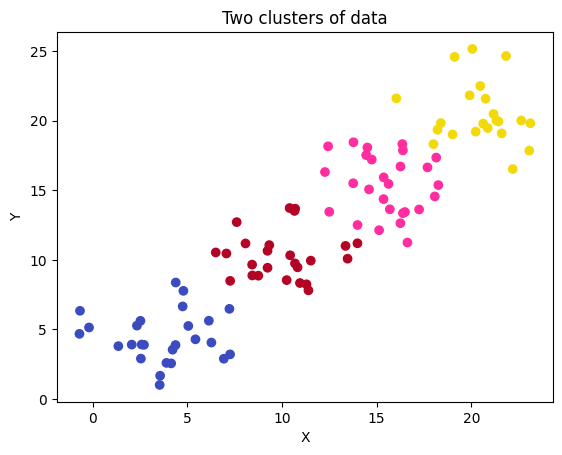

In [21]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
num_samples_total=100
cluster_centers=[(20,20,),(15,15),(10,10),(4,4)]
num_classes=len(cluster_centers)
X,targets=make_blobs(n_samples=num_samples_total,centers=cluster_centers,n_features=num_classes,center_box=(0,1),cluster_std=2)
kmeans=KMeans(init="k-means++",n_clusters=num_classes,n_init=10)
kmeans.fit(X)
P=kmeans.predict(X)
colors={
    0:'#b40426',
    1:'#3b4cc0',
    2:'#f2da0a',
    3:'#ff2da0'
}
colors=list(map(lambda X: colors[X],P))
plt.scatter(X[:,0],X[:,1],c=colors,marker="o",picker=True)
plt.title("Two clusters of data")
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

# k means dataframe

C:\Python3.11\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


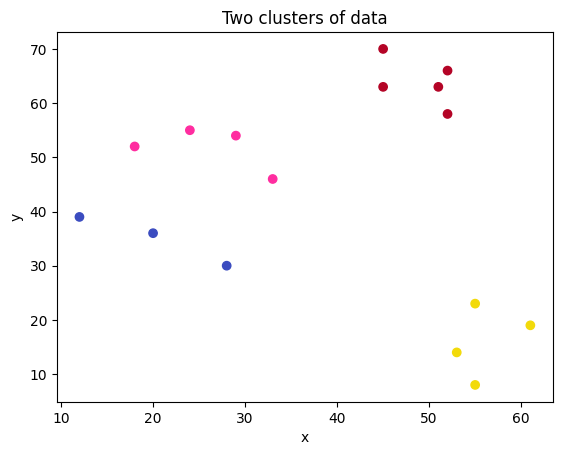

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.DataFrame({
    'x':[12,20,28,18,29,33,24,45,45,52,51,52,55,53,55,61],
    'y':[39,36,30,52,54,46,55,63,70,66,63,58,23,14,8,19]
})
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=4)
kmeans.fit(df)
labels=kmeans.predict(df)
centroids=kmeans.cluster_centers_
colors={
    0:'#b40426',
    1:'#3b4cc0',
    2:'#f2da0a',
    3:'#ff2da0'
}
colors=list(map(lambda x: colors[x],labels))
plt.scatter(df['x'],df['y'],c=colors,marker="o",picker=True)
plt.title("Two clusters of data")
plt.xlabel('x')
plt.ylabel('y')
plt.show()